In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

# 1 sleep equation #1

In [2]:
date = '''totwrk                       -0.169***         
                              (0.018)          
                                               
age                           2.689*           
                              (1.469)          
                                               
south                        101.568**         
                             (41.837)          
                                               
male                         87.669**          
                             (35.104)          
                                               
smsa                         -54.748*          
                             (33.123)          
                                               
yngkid                        -13.962          
                             (50.341)          
                                               
marr                          31.211           
                             (42.233)          
                                               
Constant                    3450.913***        
                             (80.726) '''

In [20]:
date_lst = re.findall(r'([-+]?\d+.\d+)',date)
date_lst

['-0.167',
 '0.018',
 '-6.255',
 '11.191',
 '0.109',
 '0.134',
 '114.547',
 '40.637',
 '90.457',
 '34.257',
 '3613.995',
 '218.433']

In [4]:
beta = np.reshape(date_lst,(8,2))
beta

array([['-0.169', '0.018'],
       ['2.689', '1.469'],
       ['101.568', '41.837'],
       ['87.669', '35.104'],
       ['-54.748', '33.123'],
       ['-13.962', '50.341'],
       ['31.211', '42.233'],
       ['3450.913', '80.726']], dtype='<U8')

In [5]:
beta = beta[:,0].astype(float)
beta

array([-1.690000e-01,  2.689000e+00,  1.015680e+02,  8.766900e+01,
       -5.474800e+01, -1.396200e+01,  3.121100e+01,  3.450913e+03])

In [6]:
empiric = '''totwrk age south male smsa yngkid marr
----------------------------------------
1  2150  37    0    1    1     0     1  
2  1950  28    1    1    0     1     0  
3  2240  26    0    0    1     0     0  '''

In [9]:
X = re.findall(r'([-+]?\d+)',empiric)
X

['1',
 '2150',
 '37',
 '0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1950',
 '28',
 '1',
 '1',
 '0',
 '1',
 '0',
 '3',
 '2240',
 '26',
 '0',
 '0',
 '1',
 '0',
 '0']

In [10]:
X = np.reshape(X,(3,8))
X

array([['1', '2150', '37', '0', '1', '1', '0', '1'],
       ['2', '1950', '28', '1', '1', '0', '1', '0'],
       ['3', '2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [11]:
X = np.delete(X,0,1)
X

array([['2150', '37', '0', '1', '1', '0', '1'],
       ['1950', '28', '1', '1', '0', '1', '0'],
       ['2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [12]:
X = np.c_[X,np.ones(3)]
X

array([['2150', '37', '0', '1', '1', '0', '1', '1.0'],
       ['1950', '28', '1', '1', '0', '1', '0', '1.0'],
       ['2240', '26', '0', '0', '1', '0', '0', '1.0']], dtype='<U32')

In [13]:
beta = beta.astype(float)
X = X.astype(float)

In [16]:
X@beta

array([3251.188, 3371.93 , 3087.519])

array([3249.07, 3370.01, 3085.3 ])

# 2 sleep equation #2

In [21]:
date = '''totwrk                       -0.167***         
                              (0.018)          
                                               
age                           -6.255           
                             (11.191)          
                                               
I(age2)                        0.109           
                              (0.134)          
                                               
south                       114.547***         
                             (40.637)          
                                               
male                         90.457***         
                             (34.257)          
                                               
Constant                    3613.995***        
                             (218.433)   '''

In [22]:
date_lst = re.findall(r'([-+]?\d+.\d+)',date)
date_lst

['-0.167',
 '0.018',
 '-6.255',
 '11.191',
 '0.109',
 '0.134',
 '114.547',
 '40.637',
 '90.457',
 '34.257',
 '3613.995',
 '218.433']

In [25]:
beta = np.reshape(date_lst,(6,2))
beta

array([['-0.167', '0.018'],
       ['-6.255', '11.191'],
       ['0.109', '0.134'],
       ['114.547', '40.637'],
       ['90.457', '34.257'],
       ['3613.995', '218.433']], dtype='<U8')

In [26]:
beta = beta[:,0].astype(float)
beta

array([-1.670000e-01, -6.255000e+00,  1.090000e-01,  1.145470e+02,
        9.045700e+01,  3.613995e+03])

In [44]:
empiric='''totwrk age south male
1  2160  32    1    0  
2  1720  24    0    1  
3  2390  44    0    1 '''

In [45]:
X = re.findall(r'([-+]?\d+)',empiric)
X

['1',
 '2160',
 '32',
 '1',
 '0',
 '2',
 '1720',
 '24',
 '0',
 '1',
 '3',
 '2390',
 '44',
 '0',
 '1']

In [47]:
X = np.reshape(X,(3,5))
X

array([['1', '2160', '32', '1', '0'],
       ['2', '1720', '24', '0', '1'],
       ['3', '2390', '44', '0', '1']], dtype='<U4')

In [31]:
X = np.delete(X,0,1)
X

array([['2160', '32', '1', '0'],
       ['1720', '24', '0', '1'],
       ['2390', '44', '0', '1']], dtype='<U4')

In [32]:
X = np.c_[X,np.ones(3)]
X

array([['2160', '32', '1', '0', '1.0'],
       ['1720', '24', '0', '1', '1.0'],
       ['2390', '44', '0', '1', '1.0']], dtype='<U32')

In [ ]:
df['F_nab'] = (df['R2']/(1-df['R2']))*((df['Observations']-df['m'])/(df['m']-1))
df

In [35]:
X = np.c_[X,np.ones(3)]
X

array([[2.16e+03, 3.20e+01, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [1.72e+03, 2.40e+01, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [2.39e+03, 4.40e+01, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00]])

In [36]:
beta = beta.astype(float)
X = X.astype(float)

In [37]:
X@beta

array([3143.681, 3381.639, 3144.649])

# 3 wage equation #1

In [1]:
date_string='''age                          0.021***          
                              (0.004)          
                                               
IQ                           0.008***          
                              (0.001)          
                                               
south                        -0.099***         
                              (0.027)          
                                               
married                      0.201***          
                              (0.040)          
                                               
urban                        0.175***          
                              (0.028)          
                                               
Constant                     4.974***          
                              (0.165)    '''

In [4]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date_string)
date_lst

['0.021',
 '0.004',
 '0.008',
 '0.001',
 '-0.099',
 '0.027',
 '0.201',
 '0.040',
 '0.175',
 '0.028',
 '4.974',
 '0.165']

In [49]:
beta = np.reshape(date_lst, (6,2)) 
beta

array([['0.037', '0.006'],
       ['-0.001', '0.0001'],
       ['-0.363', '0.040'],
       ['0.144', '0.045'],
       ['0.273', '0.044'],
       ['1.250', '0.061']], dtype='<U6')

In [6]:
beta[:,0]

array(['0.021', '0.008', '-0.099', '0.201', '0.175', '4.974'], dtype='<U6')

In [7]:
beta = beta[:,0].astype(float)
beta

array([ 0.021,  0.008, -0.099,  0.201,  0.175,  4.974])

In [8]:
empiric='''  age IQ  south married urban
1 36  105   1      1      1  
2 29  123   0      1      0  
3 25  112   1      0      1  '''

In [9]:
X=re.findall(r'([-+]?\d+)', empiric)
X

['1',
 '36',
 '105',
 '1',
 '1',
 '1',
 '2',
 '29',
 '123',
 '0',
 '1',
 '0',
 '3',
 '25',
 '112',
 '1',
 '0',
 '1']

In [10]:
X = np.reshape(X, (3,6))
X

array([['1', '36', '105', '1', '1', '1'],
       ['2', '29', '123', '0', '1', '0'],
       ['3', '25', '112', '1', '0', '1']], dtype='<U3')

In [12]:
X=np.delete(X, 0, 1)
X

array([['105', '1', '1', '1'],
       ['123', '0', '1', '0'],
       ['112', '1', '0', '1']], dtype='<U3')

In [14]:
X = np.c_[X, np.ones(3)]
X

array([['105', '1', '1', '1', '1.0', '1.0'],
       ['123', '0', '1', '0', '1.0', '1.0'],
       ['112', '1', '0', '1', '1.0', '1.0']], dtype='<U32')

In [15]:
beta=beta.astype(float)
X=X.astype(float)

In [16]:
X@beta

array([7.464, 7.633, 7.71 ])

# 4 wage equation #2

In [54]:
date_string='''exper                        0.037***          
                              (0.006)          
                                               
I(exper2)                    -0.001***         
                             (0.0001)          
                                               
female                       -0.363***         
                              (0.040)          
                                               
married                      0.144***          
                              (0.045)          
                                               
smsa                         0.273***          
                              (0.044)          
                                               
Constant                     1.250***          
                              (0.061)  '''

In [55]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date_string)
date_lst

['0.037',
 '0.006',
 '-0.001',
 '0.0001',
 '-0.363',
 '0.040',
 '0.144',
 '0.045',
 '0.273',
 '0.044',
 '1.250',
 '0.061']

In [56]:
beta = np.reshape(date_lst, (6,2))
beta

array([['0.037', '0.006'],
       ['-0.001', '0.0001'],
       ['-0.363', '0.040'],
       ['0.144', '0.045'],
       ['0.273', '0.044'],
       ['1.250', '0.061']], dtype='<U6')

In [57]:
beta = beta[:,0].astype(float)
beta

array([ 3.70e-02, -1.00e-03, -3.63e-01,  1.44e-01,  2.73e-01,  1.25e+00])

In [58]:
empiric='''  exper female married smsa
1   5     1       1     1  
2  26     0       0     1  
3  38     1       1     0  '''

In [59]:
X=re.findall(r'([-+]?\d+)', empiric)
X

['1', '5', '1', '1', '1', '2', '26', '0', '0', '1', '3', '38', '1', '1', '0']

In [60]:
X = np.reshape(X, (3,5))
X

array([['1', '5', '1', '1', '1'],
       ['2', '26', '0', '0', '1'],
       ['3', '38', '1', '1', '0']], dtype='<U2')

In [61]:
X=np.delete(X, 0, 1)
X

array([['5', '1', '1', '1'],
       ['26', '0', '0', '1'],
       ['38', '1', '1', '0']], dtype='<U2')

In [65]:
X = np.c_[X, np.ones(3)] 
X

array([[ 5.,  1.,  1.,  1.,  1.,  1.],
       [26.,  0.,  0.,  1.,  1.,  1.],
       [38.,  1.,  1.,  0.,  1.,  1.]])

In [66]:
beta=beta.astype(float)
X=X.astype(float)

In [67]:
X@beta

array([1.488, 2.629, 2.565])

# 5 output equation #1

In [68]:
date_string='''log(capital)                 0.208***          
                              (0.017)          
                                               
log(labour)                  0.715***          
                              (0.023)          
                                               
Constant                     -1.711***         
                              (0.097)  '''

In [69]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date_string)
date_lst

['0.208', '0.017', '0.715', '0.023', '-1.711', '0.097']

In [70]:
beta = np.reshape(date_lst, (2,3))
beta

array([['0.208', '0.017', '0.715'],
       ['0.023', '-1.711', '0.097']], dtype='<U6')

In [71]:
beta = beta[:,0].astype(float)
beta

array([0.208, 0.023])

In [72]:
empiric='''  capital labour
1  2.970 85  
2  10.450  60  
3  3.850  105  '''

In [73]:
X=re.findall(r'([-+]?\d+.\d+|[-+]?\d+)', empiric)
X

['1', '2.970', '85', '2', '10.450', '60', '3', '3.850', '105']

In [75]:
X = np.reshape(X, (3,3)) 
X

array([['1', '2.970', '85'],
       ['2', '10.450', '60'],
       ['3', '3.850', '105']], dtype='<U6')

In [76]:
X=np.delete(X, 0, 1)
X

array([['2.970', '85'],
       ['10.450', '60'],
       ['3.850', '105']], dtype='<U6')

In [77]:
beta=beta.astype(float)
X=X.astype(float)

In [78]:
X@beta

array([2.57276, 3.5536 , 3.2158 ])

# 6 output equation #2

In [79]:
date_string='''log(capital)                 0.183***          
                              (0.017)          
                                               
log(labour)                  0.515***          
                              (0.083)          
                                               
I(log(capital)2)             0.023***          
                              (0.005)          
                                               
I(log(labour)2)               0.020**          
                              (0.010)          
                                               
Constant                     -1.304***         
                              (0.189) '''

In [80]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date_string)
date_lst

['0.183',
 '0.017',
 '0.515',
 '0.083',
 '0.023',
 '0.005',
 '0.020',
 '0.010',
 '-1.304',
 '0.189']

In [81]:
beta = np.reshape(date_lst, (5,2))
beta

array([['0.183', '0.017'],
       ['0.515', '0.083'],
       ['0.023', '0.005'],
       ['0.020', '0.010'],
       ['-1.304', '0.189']], dtype='<U6')

In [82]:
beta = beta[:,0].astype(float)
beta

array([ 0.183,  0.515,  0.023,  0.02 , -1.304])

In [83]:
empiric='''  capital labour
1  22.140   407  
2  7.320   197  
3  0.670    31  '''

In [84]:
X=re.findall(r'([-+]?\d+.\d+|[-+]?\d+)', empiric)
X

['1', '22.140', '407', '2', '7.320', '197', '3', '0.670', '31']

In [85]:
X = np.reshape(X, (3,3)) # делаем двумерный массив
X

array([['1', '22.140', '407'],
       ['2', '7.320', '197'],
       ['3', '0.670', '31']], dtype='<U6')

In [86]:
X=np.delete(X, 0, 1)
X

array([['22.140', '407'],
       ['7.320', '197'],
       ['0.670', '31']], dtype='<U6')

In [93]:
X = np.c_[X, np.ones(3)] 
X

array([[ 22.14, 407.  ,   1.  ,   1.  ,   1.  ],
       [  7.32, 197.  ,   1.  ,   1.  ,   1.  ],
       [  0.67,  31.  ,   1.  ,   1.  ,   1.  ]])

In [94]:
beta=beta.astype(float)
X=X.astype(float)

In [95]:
X@beta

array([212.39562, 101.53356,  14.82661])

# Мультиколлинеарность
# 1 sleep equation #1
# 1.1 VIFs

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['totwrk2_10000'] = df['totwrk']**2/10000

In [111]:
model = smf.ols(data = df , formula = 'sleep~I(totwrk/100)+totwrk2_10000 +  age + smsa + male + south').fit()
model_1 = smf.ols(data = df , formula = 'I(totwrk/100)~totwrk2_10000 +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'totwrk2_10000~ I(totwrk/100)+  age + smsa + male + south').fit()
model_3 = smf.ols(data = df , formula = 'male~I(totwrk/100)+ I(totwrk/100)+  age + smsa  + south').fit()
model_1.params.round(3)

Intercept        9.003
totwrk2_10000    0.021
age             -0.008
smsa             0.357
male             1.071
south            0.989
dtype: float64

In [112]:
VIF_totwrk100 = 1/(1 - model_1.rsquared)
VIF_totwrk100.round(3)

8.48

In [113]:
VIF_totwrk2_10000 = 1/(1 - model_2.rsquared)
VIF_totwrk2_10000.round(3)

8.28

In [114]:
VIF_male = 1/(1 - model_3.rsquared)
VIF_male.round(2)

1.17

In [115]:
variance_inflation_factor(model.model.exog, 5).round(3)

1.173

In [116]:
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,totwrk2_10000
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,1181.9844
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,2520.0400
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,792.4225
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,1433.3796
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,665.6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,410.4676
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,45.5625
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,342.6201
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,384.5521


In [117]:
df = df[['male', 'age', 'smsa']].copy()
corr_matrix = df.corr().round(3)
corr_matrix

,male,age,smsa
male,1.000,0.032,0.007
age,0.032,1.000,0.025
smsa,0.007,0.025,1.000


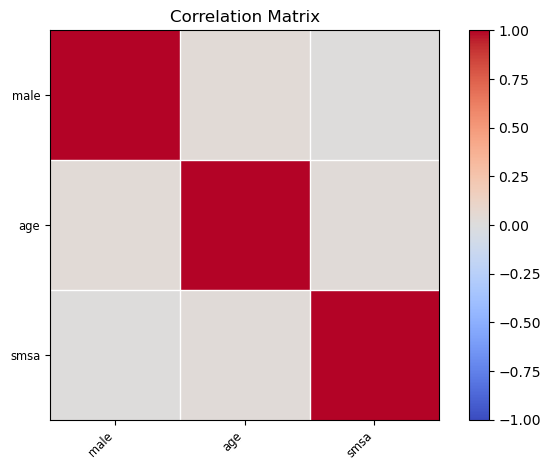

In [118]:
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='coolwarm')
plt.show()

# 1.2 Последствия

In [123]:
Sleep_eq12 = smf.ols(formula = 'sleep~I(totwrk/100)+I(totwrk**2/10000)+age+smsa+male', data = df).fit()

In [124]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(summary_col(Sleep_eq12, float_format='%.3f', stars=True, info_dict = info_dict))


                          sleep   
----------------------------------
Intercept              3428.805***
                       (76.655)   
I(totwrk / 100)        -8.195*    
                       (4.789)    
I(totwrk ** 2 / 10000) -0.214*    
                       (0.111)    
age                    2.817**    
                       (1.387)    
smsa                   -78.049**  
                       (32.072)   
male                   86.639**   
                       (34.200)   
R-squared              0.128      
R-squared Adj.         0.122      
No. Observations       706        
Residual Std. Error    416.457    
F-statistic            20.566     
Prob (F-statistic)     0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [125]:
df = summary_params(Sleep_eq12, alpha=0.05)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<0.05 else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,3428.804849,76.655048,44.730320,2.023213e-207,3278.303493,3579.306204,Значим
I(totwrk / 100),-8.195316,4.789446,-1.711120,8.750201e-02,-17.598716,1.208085,Незначим
I(totwrk ** 2 / 10000),-0.214156,0.110951,-1.930194,5.398646e-02,-0.431992,0.003680,Незначим
age,2.816697,1.386926,2.030892,4.264340e-02,0.093663,5.539731,Значим
smsa,-78.049460,32.072351,-2.433543,1.520105e-02,-141.018991,-15.079930,Значим
male,86.638759,34.199952,2.533301,1.151657e-02,19.491986,153.785532,Значим


На уровне значимости 5% значимы коэффициенты: "age" "smsa" "male"

Тестируется значимость влияния занятости, т.е. гипотеза

$$ H_0: \beta_{totwrk/100} = \beta_{totwrk^2/10000} = 0 $$

In [128]:
Sleep_eq12.f_test('I(totwrk / 100) = I(totwrk ** 2 / 10000)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=45.61921736003921, p=2.3808537043229277e-19, df_denom=700, df_num=2>

In [129]:
alpha=0.05
scipy.stats.f.ppf(1-alpha, 2, 700).round(2)

3.01

Так как $F_{stat} > F_{crit} $, то гипотеза отвергается. Значит коэффициенты совместно значимы.

In [130]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(Sleep_eq12.model.exog, i) for i in range(int(Sleep_eq12.df_model+1))]}, index=Sleep_eq12.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
I(totwrk / 100),8.370495
I(totwrk ** 2 / 10000),8.199290
age,1.005968
smsa,1.004459
male,1.169198


In [135]:
df_sleep = df[['male', 'age', 'smsa']].copy()
df_sleep['I(totwrk / 100)'] = df['totwrk']/100
df_sleep['I(totwrk ** 2 / 10000)'] = (df['totwrk']**2)/10000
corr_matrix = df_sleep.corr().round(3)
corr_matrix

,male,age,smsa,I(totwrk / 100),I(totwrk ** 2 / 10000)
male,1.000,0.032,0.007,0.376,0.351
age,0.032,1.000,0.025,-0.050,-0.046
smsa,0.007,0.025,1.000,-0.038,-0.051
I(totwrk / 100),0.376,-0.050,-0.038,1.000,0.937
I(totwrk ** 2 / 10000),0.351,-0.046,-0.051,0.937,1.000


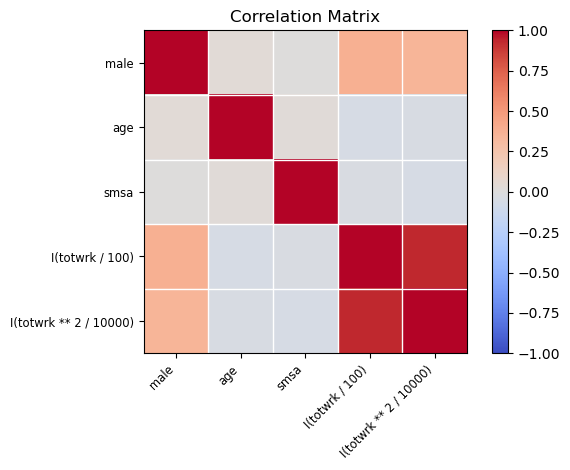

In [136]:
sm.graphics.plot_corr(corr_matrix, xnames=df_sleep.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

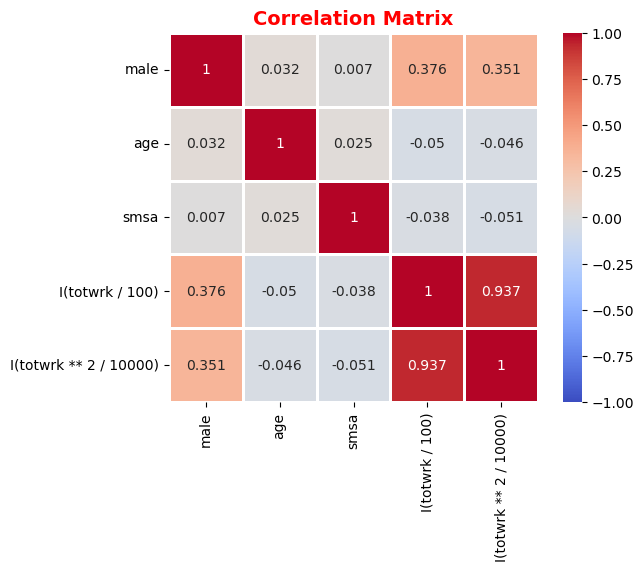

In [137]:
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')

plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

# 2 sleep equation #2

In [163]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['age_2']=df['age']*df['age']
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,age_2
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,2916


In [139]:
model = smf.ols(data = df , formula = 'sleep~totwrk +  age + +age_2+ smsa + male + south').fit()
model_1 = smf.ols(data = df , formula = 'age_2~totwrk +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'male~totwrk+  age+age_2 + smsa  + south').fit()
model_3 = smf.ols(data = df , formula = 'age~totwrk+  age + smsa +male + south').fit()
model_1.params.round(3)

Intercept   -1552.146
totwrk         -0.019
age            83.036
smsa           -0.555
male            2.636
south          17.250
dtype: float64

In [140]:
model_1.rsquared

0.9847552819309748

In [141]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

66.67

In [142]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

1.17

In [143]:
model_3.rsquared

1.0

In [144]:
VIF_3 = 1/(1 - model_3.rsquared)
VIF_3.round(2)

/var/folders/d6/bchl4dsd7311y3d_11jx0s040000gn/T/ipykernel_97133/2082198633.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  VIF_3 = 1/(1 - model_3.rsquared)


inf

# 2.2 Последствия

In [152]:
Sleep_eq12 = smf.ols(formula = 'sleep~totwrk+age+I(age**2)+smsa+male+union', data = df).fit()

In [153]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(summary_col(Sleep_eq12, float_format='%.3f', stars=True, info_dict = info_dict))


                       sleep   
-------------------------------
Intercept           3688.551***
                    (218.389)  
totwrk              -0.165***  
                    (0.018)    
age                 -7.734     
                    (11.213)   
I(age ** 2)         0.127      
                    (0.134)    
smsa                -74.527**  
                    (32.156)   
male                86.321**   
                    (34.329)   
union               8.574      
                    (38.195)   
R-squared           0.125      
R-squared Adj.      0.117      
No. Observations    706        
Residual Std. Error 417.584    
F-statistic         16.583     
Prob (F-statistic)  0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [154]:
df = summary_params(Sleep_eq12, alpha=0.05)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<0.05 else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,3688.551350,218.389349,16.889795,6.295923e-54,3259.773658,4117.329042,Значим
totwrk,-0.165252,0.018149,-9.105295,8.890671e-19,-0.200885,-0.129619,Значим
age,-7.733689,11.212815,-0.689719,4.906000e-01,-29.748520,14.281143,Незначим
I(age ** 2),0.127085,0.134030,0.948180,3.433654e-01,-0.136065,0.390235,Незначим
smsa,-74.526893,32.156290,-2.317646,2.075647e-02,-137.661382,-11.392405,Значим
male,86.321465,34.328712,2.514556,1.214165e-02,18.921722,153.721208,Значим
union,8.574424,38.194679,0.224493,8.224396e-01,-66.415617,83.564465,Незначим


На уровне значимости 5% значимы коэффициенты: "totwrk" "smsa" "male"

Тестируется значимость влияния занятости, т.е. гипотеза

$$ H_0: \beta_{age} = \beta_{age^2} = \beta_{unuin} = 0 $$

In [157]:
Sleep_eq12.f_test('age = I(age ** 2) = union =0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.6677104785997017, p=0.1726137254354761, df_denom=699, df_num=3>

In [158]:
alpha=0.05
scipy.stats.f.ppf(1-alpha, 2, 700).round(2)

3.01

Так как $F_{stat} < F_{crit} $, то гипотеза принимается. Значит коэффициенты совместно не значимы.

In [159]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(Sleep_eq12.model.exog, i) for i in range(int(Sleep_eq12.df_model+1))]}, index=Sleep_eq12.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
totwrk,1.195469
age,65.397082
I(age ** 2),65.561373
smsa,1.004278
male,1.171666
union,1.007332


In [165]:
df_sleep = df[['totwrk', 'age', 'smsa','male', 'union']].copy()
df_sleep['I(age**2)'] = df['age']^2
corr_matrix = df_sleep.corr().round(3)
corr_matrix

,totwrk,age,smsa,male,union,I(age**2)
totwrk,1.000,-0.050,-0.038,0.376,0.002,-0.053
age,-0.050,1.000,0.025,0.032,-0.037,0.985
smsa,-0.038,0.025,1.000,0.007,-0.039,0.016
male,0.376,0.032,0.007,1.000,0.040,0.029
union,0.002,-0.037,-0.039,0.040,1.000,-0.034
I(age**2),-0.053,0.985,0.016,0.029,-0.034,1.000


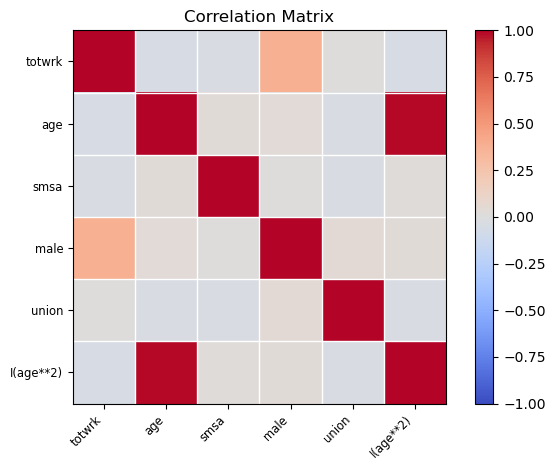

In [166]:
sm.graphics.plot_corr(corr_matrix, xnames=df_sleep.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

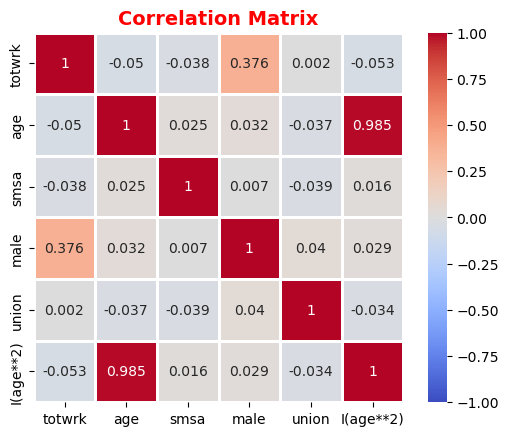

In [167]:
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')

plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

# 3 sleep equation #3
# 3.1 VIFs

In [205]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [169]:
df['totwrk_south'] = df['totwrk'] * df['south']
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,totwrk_south
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,0
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,5020
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,0
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,0
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,0
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,0
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,0
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,1961


In [170]:
model = smf.ols(data = df , formula = 'sleep ~ totwrk+south+totwrk_south+age+male+smsa').fit()
model_1 = smf.ols(data = df , formula = 'totwrk ~ south+totwrk_south+age+male+smsa').fit()
model_2 = smf.ols(data = df , formula = 'south ~ totwrk+totwrk_south+age+male+smsa').fit()
model_3 = smf.ols(data = df , formula = 'totwrk_south ~ totwrk+south+age+male+smsa').fit()
model_1.params.round(3)

Intercept       1883.936
south          -1780.732
totwrk_south       0.862
age               -3.438
male             645.996
smsa             -46.641
dtype: float64

In [171]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

1.32

In [172]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

8.55

In [173]:
VIF_3 = 1/(1 - round(model_3.rsquared,3))
VIF_3.round(2)

8.77

# 3.2 Последствия

In [186]:
Sleep_eq12 = smf.ols(formula = 'sleep~totwrk+south+I(totwrk*south)+age+male+smsa+marr', data = df).fit()

In [175]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(summary_col(Sleep_eq12, float_format='%.3f', stars=True, info_dict = info_dict))


                       sleep   
-------------------------------
Intercept           3458.811***
                    (78.683)   
totwrk              -0.177***  
                    (0.019)    
south               -39.982    
                    (118.087)  
I(totwrk * south)   0.064      
                    (0.050)    
age                 2.901**    
                    (1.386)    
male                86.269**   
                    (34.833)   
smsa                -54.647*   
                    (33.074)   
marr                29.985     
                    (41.857)   
R-squared           0.133      
R-squared Adj.      0.124      
No. Observations    706        
Residual Std. Error 415.835    
F-statistic         15.319     
Prob (F-statistic)  0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [181]:
df = summary_params(Sleep_eq12, alpha=0.05)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<0.05 else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,3458.811104,78.682955,43.958836,2.922313e-203,3304.327472,3613.294735,Значим
totwrk,-0.176879,0.019050,-9.285179,2.005225e-19,-0.214280,-0.139478,Значим
south,-39.982453,118.086614,-0.338586,7.350236e-01,-271.829986,191.865080,Незначим
I(totwrk * south),0.063785,0.050019,1.275210,2.026593e-01,-0.034421,0.161992,Незначим
age,2.901004,1.386244,2.092708,3.673571e-02,0.179297,5.622711,Значим
male,86.269452,34.833373,2.476632,1.349874e-02,17.878707,154.660198,Значим
smsa,-54.647254,33.073979,-1.652273,9.892856e-02,-119.583661,10.289153,Незначим
marr,29.985029,41.857023,0.716368,4.740038e-01,-52.195731,112.165788,Незначим


In [177]:
df = summary_params(Sleep_eq12, alpha=0.05)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<0.05 else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,3458.811104,78.682955,43.958836,2.922313e-203,3304.327472,3613.294735,Значим
totwrk,-0.176879,0.019050,-9.285179,2.005225e-19,-0.214280,-0.139478,Значим
south,-39.982453,118.086614,-0.338586,7.350236e-01,-271.829986,191.865080,Незначим
I(totwrk * south),0.063785,0.050019,1.275210,2.026593e-01,-0.034421,0.161992,Незначим
age,2.901004,1.386244,2.092708,3.673571e-02,0.179297,5.622711,Значим
male,86.269452,34.833373,2.476632,1.349874e-02,17.878707,154.660198,Значим
smsa,-54.647254,33.073979,-1.652273,9.892856e-02,-119.583661,10.289153,Незначим
marr,29.985029,41.857023,0.716368,4.740038e-01,-52.195731,112.165788,Незначим


На уровне значимости 5% значимы коэффициенты: "totwrk" "age" "male"

Тестируется значимость влияния занятости, т.е. гипотеза

$$ H_0: \beta_{south} = \beta_{totwrk*south} = \beta_{smsa} = \beta_{marr} = 0 $$

In [178]:
Sleep_eq12.f_test('south = I(totwrk * south) = smsa = marr =0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.3426353050249418, p=0.010059616621988614, df_denom=698, df_num=4>

In [179]:
alpha=0.05
scipy.stats.f.ppf(1-alpha, 2, 700).round(2)

3.01

Так как $F_{stat} < F_{crit} $, то гипотеза принимается. Значит коэффициенты совместно не значимы.

In [180]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(Sleep_eq12.model.exog, i) for i in range(int(Sleep_eq12.df_model+1))]}, index=Sleep_eq12.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
totwrk,1.328161
south,8.553057
I(totwrk * south),8.734279
age,1.007988
male,1.216541
smsa,1.071376
marr,1.048792


In [206]:
df_sleep = df[['totwrk','south','age' ,'male', 'smsa','marr']].copy()
df_sleep['I(totwrk*south)'] = df['totwrk'*'south']
corr_matrix = df_sleep.corr().round(3)
corr_matrix

TypeError: can't multiply sequence by non-int of type 'str'

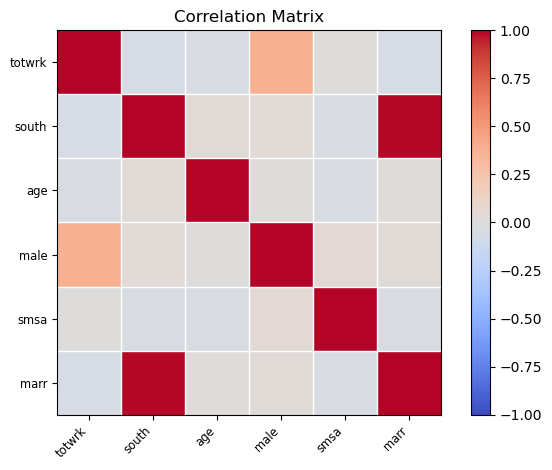

In [200]:
sm.graphics.plot_corr(corr_matrix, xnames=df_sleep.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

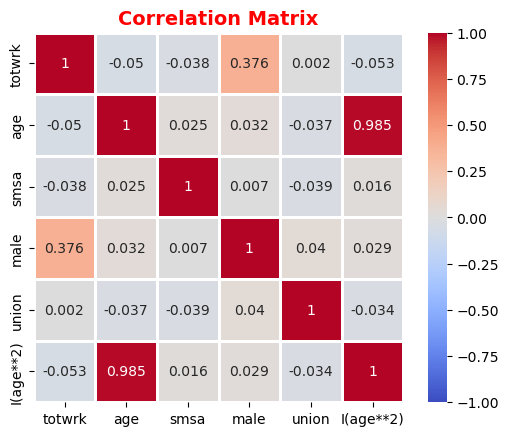

In [201]:
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')

plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

# 4 wage equation #1
# 4.1 VIFs

In [208]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [209]:
model = smf.ols(data = df , formula = 'np.log(wage) ~ age+ I(age**2)+ IQ+ married+ south+ urban').fit()
model_1 = smf.ols(data = df , formula = 'age ~ I(age**2)+ IQ+married+south+urban').fit()
model_2 = smf.ols(data = df , formula = 'I(age**2) ~ age+ IQ+married+south+urban').fit()
model_3 = smf.ols(data = df , formula = 'urban ~age+I(age**2)+IQ+married+south').fit()
model_1.params.round(3)

Intercept      16.514
I(age ** 2)     0.015
IQ             -0.000
married        -0.003
south           0.010
urban           0.014
dtype: float64

In [210]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

500.0

In [211]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

500.0

In [212]:
VIF_3 = 1/(1 - round(model_3.rsquared,3))
VIF_3.round(2)

1.02

# 5 wage equation #2 (структурные сдвиги)
# 5.1 VIFs

In [214]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [215]:
df['age_urban']=df['age']*df['urban']
df['IQ_urban']=df['IQ']*df['urban']
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,age_urban,IQ_urban
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091,31,93
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562,37,119
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384,33,108
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973,32,96
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502,34,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829,0,0
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742,31,102
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858,0,0
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935,0,0


In [216]:
model_1 = smf.ols(data = df , formula = 'age ~ urban+age_urban+ IQ+IQ_urban').fit()
model_2 = smf.ols(data = df , formula = 'urban ~ age+age_urban+IQ+IQ_urban').fit()
model_3 = smf.ols(data = df , formula = 'age_urban ~ age+urban+IQ+IQ_urban').fit()
model_1.params.round(3)

Intercept    33.242
urban       -33.242
age_urban     1.000
IQ           -0.001
IQ_urban      0.001
dtype: float64

In [217]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

3.32

In [218]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

166.67

In [219]:
VIF_3 = 1/(1 - round(model_3.rsquared,3))
VIF_3.round(2)

111.11